# Análisis de ventas y popularidad de videojuegos

## Introducción
En este proyecto, trabajaremos con los datos de ventas de videojuegos proporcionados por la tienda online Ice. Los datos incluyen información relevante como el nombre del juego, la plataforma, el año de lanzamiento, el género, las ventas en distintas regiones, las calificaciones de críticos y usuarios, y la clasificación ESRB.

El objetivo principal es identificar patrones que determinen si un juego es exitoso, lo que nos permitirá detectar proyectos prometedores y planificar campañas publicitarias efectivas para el año 2017. Durante el análisis, nos centraremos en varias tareas clave, como la preparación y limpieza de los datos, el análisis de tendencias en ventas, la creación de perfiles de usuario por región, y la prueba de hipótesis. Finalmente, resumiremos nuestros hallazgos y formularemos conclusiones basadas en el análisis.

## Descripción de los datos
A continuación, se presenta un diccionario de datos que incluye las características disponibles en el dataset:

- **Name**: Nombre del videojuego.
- **Platform**: Plataforma en la que el videojuego fue lanzado (e.g., Xbox, PlayStation).
- **Year_of_Release**: Año en que el videojuego fue lanzado.
- **Genre**: Género del videojuego (e.g., Acción, Deportes).
- **NA_sales**: Ventas en Norteamérica (en millones de dólares estadounidenses).
- **EU_sales**: Ventas en Europa (en millones de dólares estadounidenses).
- **JP_sales**: Ventas en Japón (en millones de dólares estadounidenses).
- **Other_sales**: Ventas en otras regiones (en millones de dólares estadounidenses).
- **Critic_Score**: Calificación otorgada por críticos (máximo de 100).
- **User_Score**: Calificación otorgada por usuarios (máximo de 10).
- **Rating**: Clasificación ESRB del videojuego (e.g., E para todos, T para adolescentes).

En los siguientes pasos, prepararemos y analizaremos los datos para alcanzar nuestros objetivos.


## Paso 1. Abrir el archivo de datos

En este primer paso, abriremos el archivo de datos con el que trabajaremos a lo largo del proyecto. Esto nos permitirá tener una visión general de la información disponible y planificar las siguientes etapas del análisis.


In [11]:
# Importar las librerías necesarias
import pandas as pd

# Cargar los datos
games_df= pd.read_csv('/datasets/games.csv')

# Mostrar las primeras filas del DataFrame para revisar los datos
games_df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Paso 2. Preparar los datos

En este paso, prepararemos los datos para su análisis. Primero, reemplazaremos los nombres de las columnas por versiones en minúsculas para una mejor legibilidad y consistencia en el trabajo.


In [12]:
# Cambiar los nombres de las columnas a minúsculas
games_df.columns = games_df.columns.str.lower()

# Verificar los cambios
games_df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Convertir los datos a los tipos necesarios

En este paso, revisaremos los tipos de datos de las columnas para asegurarnos de que cada una esté en el formato adecuado. Posteriormente, haremos las conversiones necesarias para facilitar el análisis.


In [13]:
# Verificar los tipos de datos actuales
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Con base en los datos mostrados, identificamos las columnas que necesitan una conversión de tipo de datos:

- **year_of_release**: Está en formato `float64`. Lo convertiremos a `Int64` (que soporta valores nulos) ya que esta columna representa años y no necesitamos decimales.

- **user_score**: Actualmente es de tipo `object`. Parece representar puntuaciones, por lo que la convertiremos a `float64` para permitir operaciones matemáticas. Será necesario manejar los valores ausentes o incorrectos durante la conversión.

- **rating**: Es de tipo `object`. No necesitamos cambiarlo a otro tipo por ahora, ya que es un campo categórico.


In [14]:
# Convertir 'year_of_release' a tipo 'Int64' (soporta nulos)
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce').astype('Int64')

# Convertir 'user_score' a tipo 'float64', reemplazando valores no numéricos con NaN
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

# Verificar los cambios
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Manejo de valores ausentes

En esta sección, identificaremos y trataremos los valores ausentes en el conjunto de datos. Explicaremos las decisiones tomadas para rellenar o dejar en blanco los valores ausentes según corresponda. También prestaremos especial atención a la abreviatura "TBD" en la columna de puntajes, ya que significa "to be determined" (a determinar), y decidiremos cómo manejar estos casos.


In [15]:
# Revisar la cantidad de valores ausentes en cada columna
games_df.isna().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

### Decisiones para tratar los valores ausentes

- **name y genre**: Estas columnas son esenciales para el análisis, ya que contienen información clave sobre los juegos. Las filas con valores ausentes en estas columnas serán eliminadas.
  
- **year_of_release**: Dado que el año de lanzamiento es importante para nuestro análisis de tendencias, eliminaremos las filas donde este valor esté ausente.

- **critic_score y user_score**: Estas columnas contienen muchos valores ausentes. En lugar de eliminar una gran cantidad de datos, reemplazaremos los valores ausentes con el promedio de cada columna. Esto proporcionará una referencia para los juegos sin puntuación. 
  - En el caso de `user_score`, encontramos valores con la abreviatura "TBD" (to be determined). Durante la conversión a tipo `float64`, estos valores fueron reemplazados automáticamente por `NaN` (valores nulos). Ahora, trataremos esos `NaN` rellenándolos con el promedio de la columna.

- **rating**: La gran cantidad de valores ausentes sugiere que muchos juegos no fueron clasificados por la ESRB. Rellenaremos estos valores con "Unknown" para indicar la falta de información.


In [16]:
# Eliminar filas con valores ausentes en 'name' y 'genre'
games_df.dropna(subset=['name', 'genre'], inplace=True)

# Eliminar filas con valores ausentes en 'year_of_release'
games_df.dropna(subset=['year_of_release'], inplace=True)

# Rellenar valores ausentes en 'critic_score' y 'user_score' con la media de cada columna
games_df['critic_score'].fillna(games_df['critic_score'].mean(), inplace=True)
games_df['user_score'].fillna(games_df['user_score'].mean(), inplace=True)

# Rellenar valores ausentes en 'rating' con 'Unknown'
games_df['rating'].fillna('Unknown', inplace=True)

# Verificar que no queden valores ausentes
games_df.isna().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Cálculo de ventas totales

En este paso, calcularemos las ventas totales para cada juego sumando las ventas en todas las regiones disponibles: Norteamérica, Europa, Japón y otras regiones. El resultado se almacenará en una nueva columna llamada `total_sales`.


In [17]:
# Calcular las ventas totales y añadir una nueva columna 'total_sales'
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

# Verificar los cambios
games_df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,Unknown,31.38


## Paso 3. Análisis de los datos

En este paso, analizaremos los datos disponibles para obtener información relevante. Primero, veremos cuántos juegos fueron lanzados en diferentes años para evaluar si los datos de cada período son significativos.


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


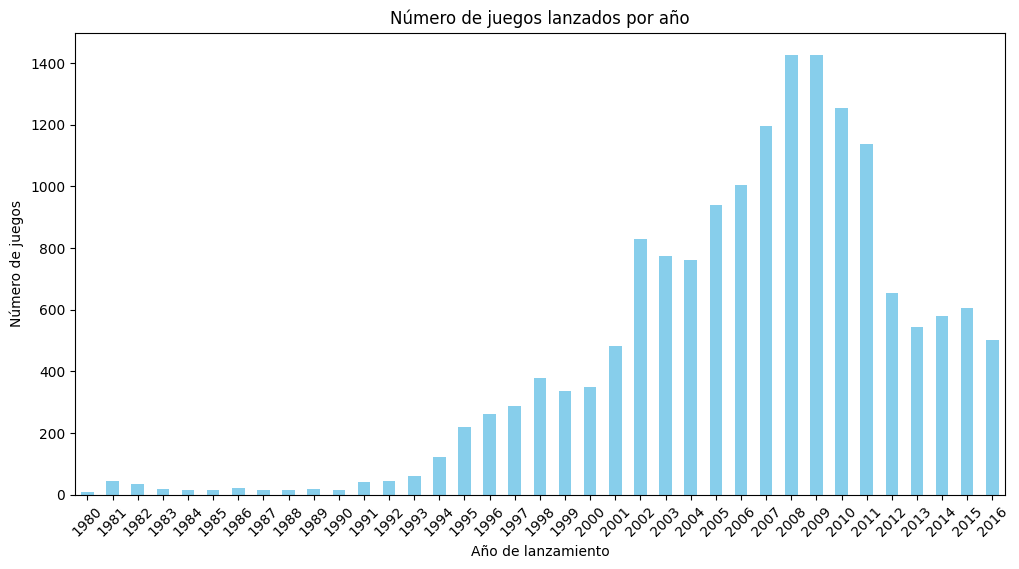

In [18]:
# Contar el número de juegos lanzados por año
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Mostrar el número de juegos lanzados por año
print(games_per_year)

# Visualizar los lanzamientos por año mediante un gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()


### Análisis de los lanzamientos de juegos por año

El gráfico y los datos muestran la cantidad de juegos lanzados desde 1980 hasta 2016. Podemos observar que el número de lanzamientos de videojuegos ha fluctuado considerablemente a lo largo del tiempo.

- **Años anteriores a 1994**: En los primeros años, desde 1980 hasta 1993, el número de lanzamientos anuales es muy reducido, con la mayoría de los años teniendo menos de 50 juegos. Esto sugiere que los datos de este período podrían no ser tan significativos para analizar tendencias actuales, ya que representan una época en la que la industria de los videojuegos estaba en sus inicios y el mercado era mucho más pequeño.

- **Crecimiento y auge**: A partir de 1994, el número de juegos lanzados comenzó a incrementarse significativamente, reflejando el crecimiento de la industria de los videojuegos. Esta tendencia continuó hasta alcanzar un pico entre 2007 y 2009, donde se observa el mayor número de lanzamientos, superando los 1,400 juegos por año. Estos años pueden ser considerados como el auge de los lanzamientos de videojuegos.

- **Declive gradual**: Después de 2009, se nota una disminución en la cantidad de juegos lanzados anualmente. Aun así, la cantidad de lanzamientos sigue siendo relativamente alta en comparación con los primeros años. Esto podría reflejar cambios en el mercado, como la transición hacia plataformas de distribución digital y nuevas formas de consumo de videojuegos.

#### ¿Son significativos los datos de cada período?
Los datos a partir de 1994 parecen ser más significativos, ya que muestran un mercado de videojuegos más desarrollado y tendencias más claras. Los datos anteriores a 1994 son menos representativos debido al bajo número de lanzamientos, lo que podría dificultar un análisis general del mercado. Por lo tanto, para análisis futuros y patrones de ventas, sería más relevante centrarse en los datos de 1994 en adelante.


### Análisis de las ventas por plataforma

En esta sección, analizaremos cómo varían las ventas de videojuegos entre las diferentes plataformas. Primero, identificaremos las plataformas con las mayores ventas totales. Posteriormente, construiremos una distribución de ventas basada en los datos de cada año para observar las tendencias. Esto nos permitirá identificar las plataformas que solían ser populares, así como aquellas que han desaparecido. Finalmente, analizaremos cuánto tiempo tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.


Plataformas con mayores ventas totales:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


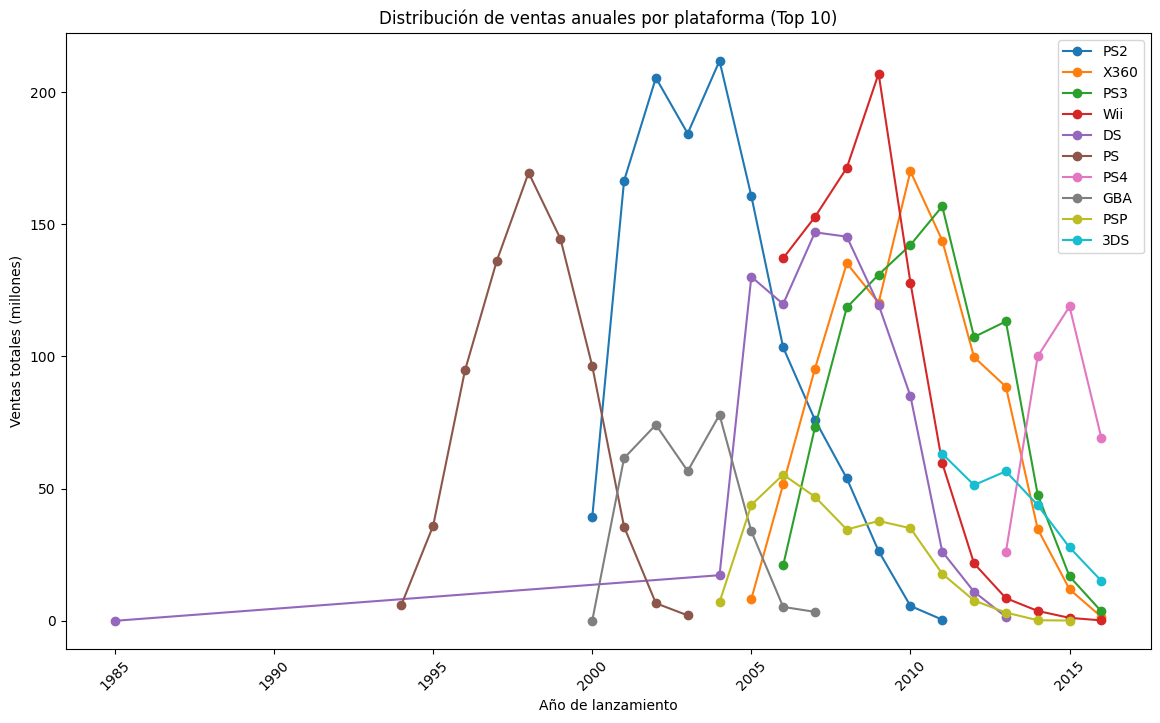

In [19]:
# Calcular las ventas totales por plataforma y seleccionar las principales
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10).index

# Mostrar las plataformas con mayores ventas totales
print("Plataformas con mayores ventas totales:")
print(platform_sales.head(10))

# Filtrar los datos para las plataformas seleccionadas
top_platforms_df = games_df[games_df['platform'].isin(top_platforms)]

# Construir una distribución basada en los datos de cada año para las plataformas seleccionadas
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for platform in top_platforms:
    yearly_sales = top_platforms_df[top_platforms_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label=platform)

plt.title('Distribución de ventas anuales por plataforma (Top 10)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Análisis de los resultados

1. **Plataformas con mayores ventas totales**:
   - Las plataformas con las mayores ventas totales son:
     - PS2 (Sony PlayStation 2): 1,233.56 millones.
     - X360 (Microsoft Xbox 360): 961.24 millones.
     - PS3 (Sony PlayStation 3): 931.34 millones.
     - Wii (Nintendo Wii): 891.18 millones.
     - DS (Nintendo DS): 802.78 millones.
   - Estas plataformas fueron las más exitosas en términos de ventas durante su período de actividad.

2. **Distribución de ventas a lo largo del tiempo**:
   - El gráfico muestra cómo las ventas de las plataformas alcanzan un pico unos años después de su lanzamiento y luego comienzan a disminuir.
     - La **PS2** alcanzó su punto máximo de ventas alrededor de 2002-2004 y luego comenzó a declinar.
     - La **Nintendo DS** tuvo un rápido aumento de ventas entre 2005 y 2007, manteniéndose alta hasta 2009, antes de empezar a caer.
     - La **Xbox 360** y la **PS3** alcanzaron su auge alrededor de 2008-2010 y declinaron con la llegada de la siguiente generación de consolas.
     
3. **Plataformas que solían ser populares pero que ya no tienen ventas**:
   - Algunas plataformas como la **PS2**, **GBA**, y **PSP** muestran una clara curva de ventas que disminuye a cero en los años más recientes, indicando que ya no son relevantes en el mercado actual.

4. **Tiempo de aparición y desaparición de plataformas**:
   - Generalmente, una nueva plataforma tarda entre 1 a 3 años en alcanzar su pico de ventas después de su lanzamiento.
   - Las plataformas antiguas suelen declinar durante un período de 5 a 7 años después de haber alcanzado su punto máximo. Por ejemplo, la **PS2** estuvo activa por más de una década antes de desaparecer del mercado.

### Resumen
Las ventas de las plataformas varían considerablemente a lo largo del tiempo. Las plataformas nuevas pueden tardar algunos años en consolidarse, mientras que las antiguas pueden durar varios años antes de desaparecer por completo. Este ciclo refleja el desarrollo y la evolución constante de la industria de los videojuegos.


### Selección del período para el análisis

Para determinar el período de tiempo que debemos considerar para nuestros análisis futuros y la construcción de un modelo para 2017, es crucial enfocarnos en los datos más recientes, ya que la industria de los videojuegos cambia con rapidez.

1. **Evolución de las ventas**: Observamos que las ventas alcanzaron su pico alrededor de 2008-2009 y comenzaron a disminuir gradualmente. Además, las plataformas suelen tener un ciclo de vida de aproximadamente 5 a 7 años antes de ser reemplazadas por la siguiente generación.

2. **Datos representativos**: Los datos anteriores a 2006 reflejan una etapa distinta en el desarrollo de la industria y no serían tan útiles para predecir las tendencias actuales. Por esta razón, los datos desde 2006 en adelante son los más representativos del mercado actual y serán más útiles para construir un modelo confiable para 2017.

### Decisión
Para nuestros análisis futuros y la construcción del modelo, seleccionaremos los datos del período comprendido entre 2006 y 2016. Este rango de tiempo captura tanto los cambios recientes en la industria como la información relevante para predecir tendencias en 2017.


### Filtrado de datos relevantes

En este paso, filtraremos nuestro conjunto de datos para incluir solo los años que consideramos relevantes para nuestro análisis y la construcción del modelo para 2017. Como hemos determinado previamente, trabajaremos con los datos comprendidos entre 2006 y 2016. Ignoraremos los datos anteriores a 2006, ya que no representan las tendencias actuales del mercado de videojuegos.


In [20]:
# Filtrar los datos para incluir solo los años de 2006 en adelante
relevant_games_df = games_df[games_df['year_of_release'] >= 2006]

# Verificar los cambios
relevant_games_df['year_of_release'].describe()


count    10333.000000
mean      2010.052744
std          2.870550
min       2006.000000
25%       2008.000000
50%       2010.000000
75%       2012.000000
max       2016.000000
Name: year_of_release, dtype: float64

### Análisis de plataformas líderes en ventas

En este paso, identificaremos las plataformas que son líderes en ventas y analizaremos sus tendencias a lo largo del tiempo. Esto nos permitirá determinar cuáles están en crecimiento y cuáles están en declive. Con base en estos resultados, seleccionaremos varias plataformas potencialmente rentables para análisis futuros.


Plataformas líderes en ventas totales:
platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64


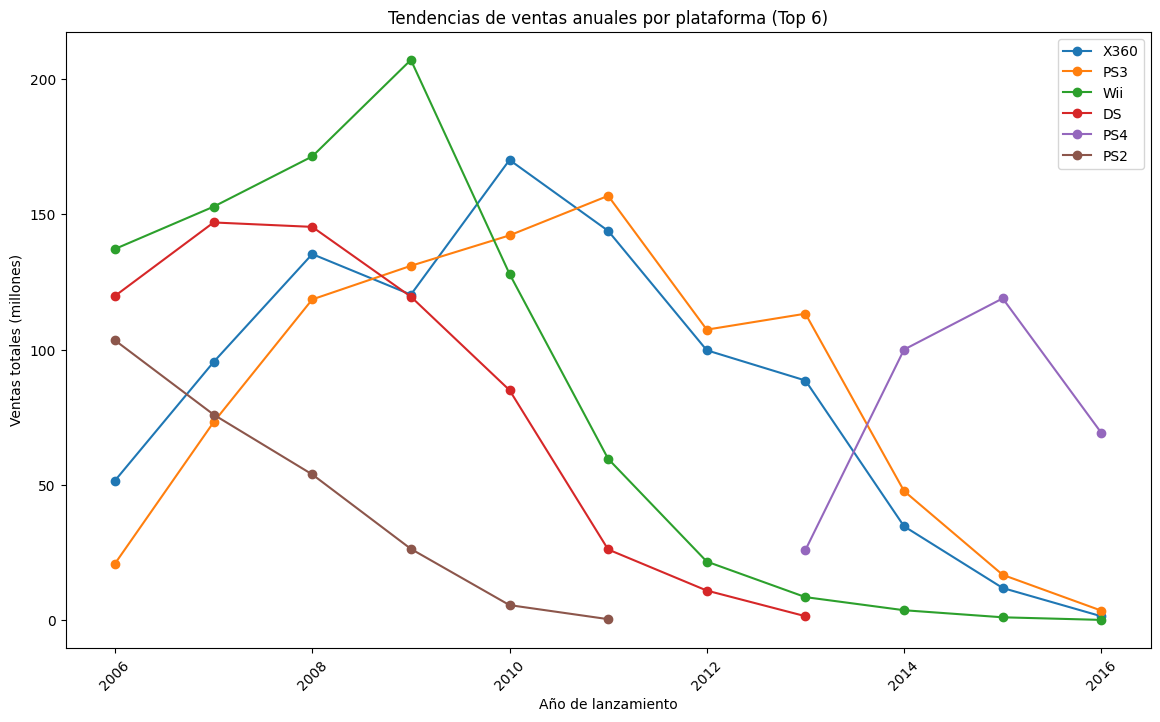

In [22]:
# Calcular las ventas totales por plataforma
platform_sales = relevant_games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas líderes en ventas
print("Plataformas líderes en ventas totales:")
print(platform_sales)

# Visualizar las tendencias de ventas anuales para las plataformas líderes
top_platforms = platform_sales.head(6).index  # Seleccionar las 6 plataformas principales

plt.figure(figsize=(14, 8))
for platform in top_platforms:
    yearly_sales = relevant_games_df[relevant_games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label=platform)

plt.title('Tendencias de ventas anuales por plataforma (Top 6)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Análisis de plataformas líderes en ventas

1. **Plataformas líderes en ventas totales**:
   - Las plataformas con las mayores ventas totales desde 2006 son:
     - **X360** (Xbox 360): 952.99 millones.
     - **PS3** (PlayStation 3): 931.34 millones.
     - **Wii**: 891.18 millones.
     - **DS** (Nintendo DS): 655.35 millones.
     - **PS4** (PlayStation 4): 314.14 millones.
     - **PS2** (PlayStation 2): 265.80 millones.

2. **Crecimiento y declive de las plataformas**:
   - **Crecen**:
     - La **PS4** es la única plataforma en el gráfico que muestra una tendencia de crecimiento hacia el año 2016. Esto indica que la PS4 está en un período de auge y tiene el potencial de ser una plataforma rentable para el futuro.
   - **Reducen**:
     - La **X360**, **PS3**, y **Wii** tuvieron su auge alrededor de 2008-2010, pero muestran una disminución constante en los años posteriores. Esto sugiere que estas plataformas están en declive y podrían no ser tan rentables en el futuro.
     - La **DS** y la **PS2** también muestran una clara tendencia a la baja y parecen haber alcanzado el final de su ciclo de vida.

3. **Plataformas potencialmente rentables**:
   - Basándonos en este análisis, la **PS4** es la plataforma más prometedora, ya que muestra una tendencia de crecimiento hacia el año 2016, lo que indica que aún está en una fase de auge.
   - Las otras plataformas principales, como la **X360**, **PS3**, y **Wii**, ya están en una etapa de declive y es menos probable que sigan siendo rentables en los próximos años.

### Conclusión
Para futuros análisis y modelos de predicción de ventas, la **PS4** parece ser la plataforma más rentable y prometedora debido a su crecimiento reciente. Las demás plataformas principales muestran tendencias decrecientes, indicando que han pasado su período de auge.


### Diagrama de caja de ventas globales por plataforma

En este paso, crearemos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. Esto nos permitirá visualizar las diferencias en las ventas y observar las ventas promedio para cada plataforma. Luego, analizaremos si las diferencias son significativas y qué hallazgos podemos extraer de las ventas promedio en las distintas plataformas.


<Figure size 1400x800 with 0 Axes>

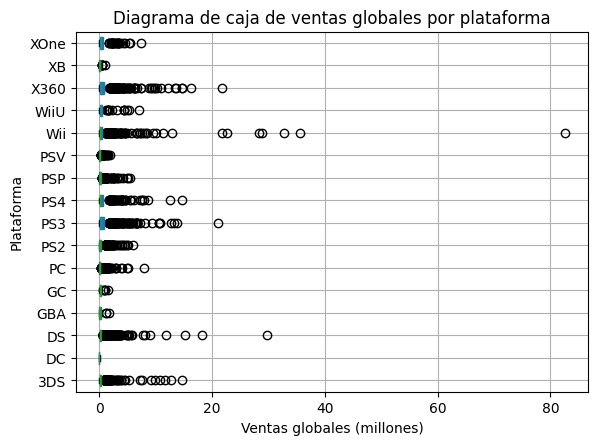

In [24]:
import matplotlib.pyplot as plt

# Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(14, 8))
relevant_games_df.boxplot(column='total_sales', by='platform', vert=False, patch_artist=True)
plt.title('Diagrama de caja de ventas globales por plataforma')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Plataforma')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.show()


### Diagrama de caja de ventas globales por plataforma: análisis y conclusiones

El diagrama de caja muestra la distribución de las ventas globales para cada plataforma, lo que nos permite comparar las diferencias en las ventas y observar las ventas promedio.

1. **Distribución general**:
   - La mayoría de las plataformas tienen una distribución de ventas concentrada en la parte inferior del gráfico, lo que indica que la mayoría de los juegos no generan ventas extremadamente altas. Las cajas (que representan el rango intercuartílico) son relativamente pequeñas para la mayoría de las plataformas, sugiriendo que las ventas están concentradas en un rango reducido.

2. **Diferencias en ventas**:
   - Las plataformas **Wii**, **X360**, y **PS3** tienen varios puntos de ventas globales muy altos, que se muestran como círculos fuera de la caja (valores atípicos). Estos representan juegos que tuvieron ventas extraordinarias en comparación con la mayoría.
   - La **Wii** muestra una dispersión amplia, con algunos juegos alcanzando ventas de hasta 80 millones de unidades. Esto indica que, aunque muchos juegos en la Wii no son grandes éxitos, algunos pocos alcanzan ventas masivas.
   - **X360** y **PS3** también tienen algunos valores atípicos altos, aunque no tan extremos como los de la Wii.

3. **Ventas promedio**:
   - La línea dentro de cada caja representa la mediana de las ventas globales. En la mayoría de las plataformas, esta línea está baja, lo que indica que la mediana de las ventas es generalmente baja. Esto es común en el mercado de videojuegos, donde solo un pequeño número de juegos se convierte en grandes éxitos.
   - Las plataformas más recientes, como **XOne** y **PS4**, muestran ventas más centradas, indicando que las ventas de los juegos son más consistentes, aunque hay menos valores extremos.

4. **Significancia de las diferencias**:
   - Las diferencias en las ventas entre plataformas como **Wii**, **X360**, y **PS3** frente a otras como **GBA**, **DC**, y **3DS**, son bastante significativas. Esto sugiere que el éxito de los juegos puede estar influenciado no solo por el título del juego en sí, sino también por la plataforma en la que se lanzan.

### Conclusiones
- Algunas plataformas como la **Wii**, **X360**, y **PS3** tuvieron juegos con ventas globales muy altas, aunque la mayoría de los juegos en estas plataformas tienen ventas moderadas o bajas.
- Las plataformas más recientes como **PS4** y **XOne** muestran una dispersión menor, lo que podría indicar un mercado más estable y competitivo.
- Las diferencias en las ventas por plataforma son significativas, con algunas plataformas mostrando potencial para juegos de éxito masivo.


### Análisis de la influencia de las reseñas en las ventas

En este paso, analizaremos cómo las reseñas de usuarios y profesionales afectan las ventas globales de una plataforma popular. Para este análisis, seleccionaremos la PS4 y crearemos gráficos de dispersión que muestren la relación entre las reseñas y las ventas. Posteriormente, calcularemos el coeficiente de correlación para cuantificar la relación y sacaremos conclusiones.


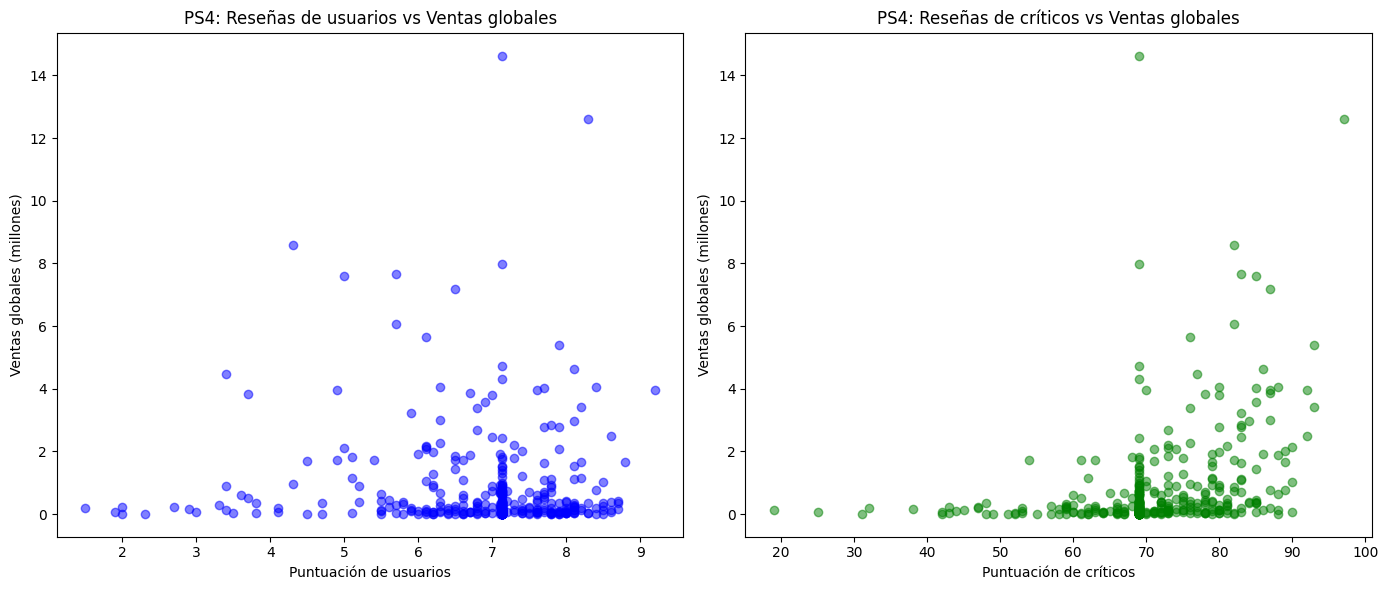

Correlación entre reseñas de usuarios y ventas: -0.05
Correlación entre reseñas de críticos y ventas: 0.35


In [25]:
# Filtrar los datos para la plataforma PS4
ps4_data = relevant_games_df[relevant_games_df['platform'] == 'PS4']

# Crear gráficos de dispersión para las reseñas de usuarios y profesionales
plt.figure(figsize=(14, 6))

# Gráfico de dispersión: user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5, color='blue')
plt.title('PS4: Reseñas de usuarios vs Ventas globales')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones)')

# Gráfico de dispersión: critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5, color='green')
plt.title('PS4: Reseñas de críticos vs Ventas globales')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones)')

plt.tight_layout()
plt.show()

# Calcular la correlación entre las reseñas y las ventas
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas: {user_corr:.2f}")
print(f"Correlación entre reseñas de críticos y ventas: {critic_corr:.2f}")


### Análisis de la influencia de las reseñas en las ventas

En este análisis, observamos cómo las reseñas de usuarios y críticos afectan las ventas globales de los juegos para la plataforma PS4. A continuación, se presentan los resultados de los gráficos de dispersión y el cálculo de correlación:

1. **Gráfico de dispersión: Reseñas de usuarios vs. Ventas globales**:
   - La correlación entre las reseñas de usuarios y las ventas globales es muy baja (`-0.05`), lo que indica que no hay una relación significativa entre la puntuación que los usuarios otorgan a los juegos y las ventas.
   - Esto sugiere que las ventas de los juegos para PS4 no dependen mucho de las reseñas de los usuarios, al menos no de manera directa. Es posible que otros factores, como la publicidad, exclusividad del juego, o campañas de marketing, tengan un mayor impacto en las ventas.

2. **Gráfico de dispersión: Reseñas de críticos vs. Ventas globales**:
   - La correlación entre las reseñas de críticos y las ventas globales es moderada (`0.35`). Esto indica una correlación positiva, aunque no muy fuerte. En otras palabras, los juegos que reciben mejores puntuaciones de los críticos tienden a tener mayores ventas.
   - Aunque esta correlación no es muy alta, muestra que las reseñas de los críticos tienen cierta influencia en el desempeño comercial de los juegos, más que las reseñas de los usuarios.

### Conclusiones
- Las reseñas de usuarios no parecen tener un impacto significativo en las ventas de los juegos para PS4, según los datos analizados. Esto puede deberse a que los jugadores toman decisiones de compra basadas en otros factores, como la popularidad del juego, campañas de marketing, o promociones.
- Las reseñas de críticos muestran una correlación positiva moderada con las ventas. Esto sugiere que las opiniones de los críticos pueden influir en la percepción de los juegos y, en consecuencia, en las decisiones de compra, aunque no de manera determinante.


### Comparación de las ventas de los mismos juegos en diferentes plataformas

En este paso, compararemos las ventas de los juegos que se lanzaron en múltiples plataformas. Esto nos permitirá observar si las ventas varían significativamente dependiendo de la plataforma en la que se lanza un juego y si algunos sistemas tienden a tener mejores ventas para títulos específicos.


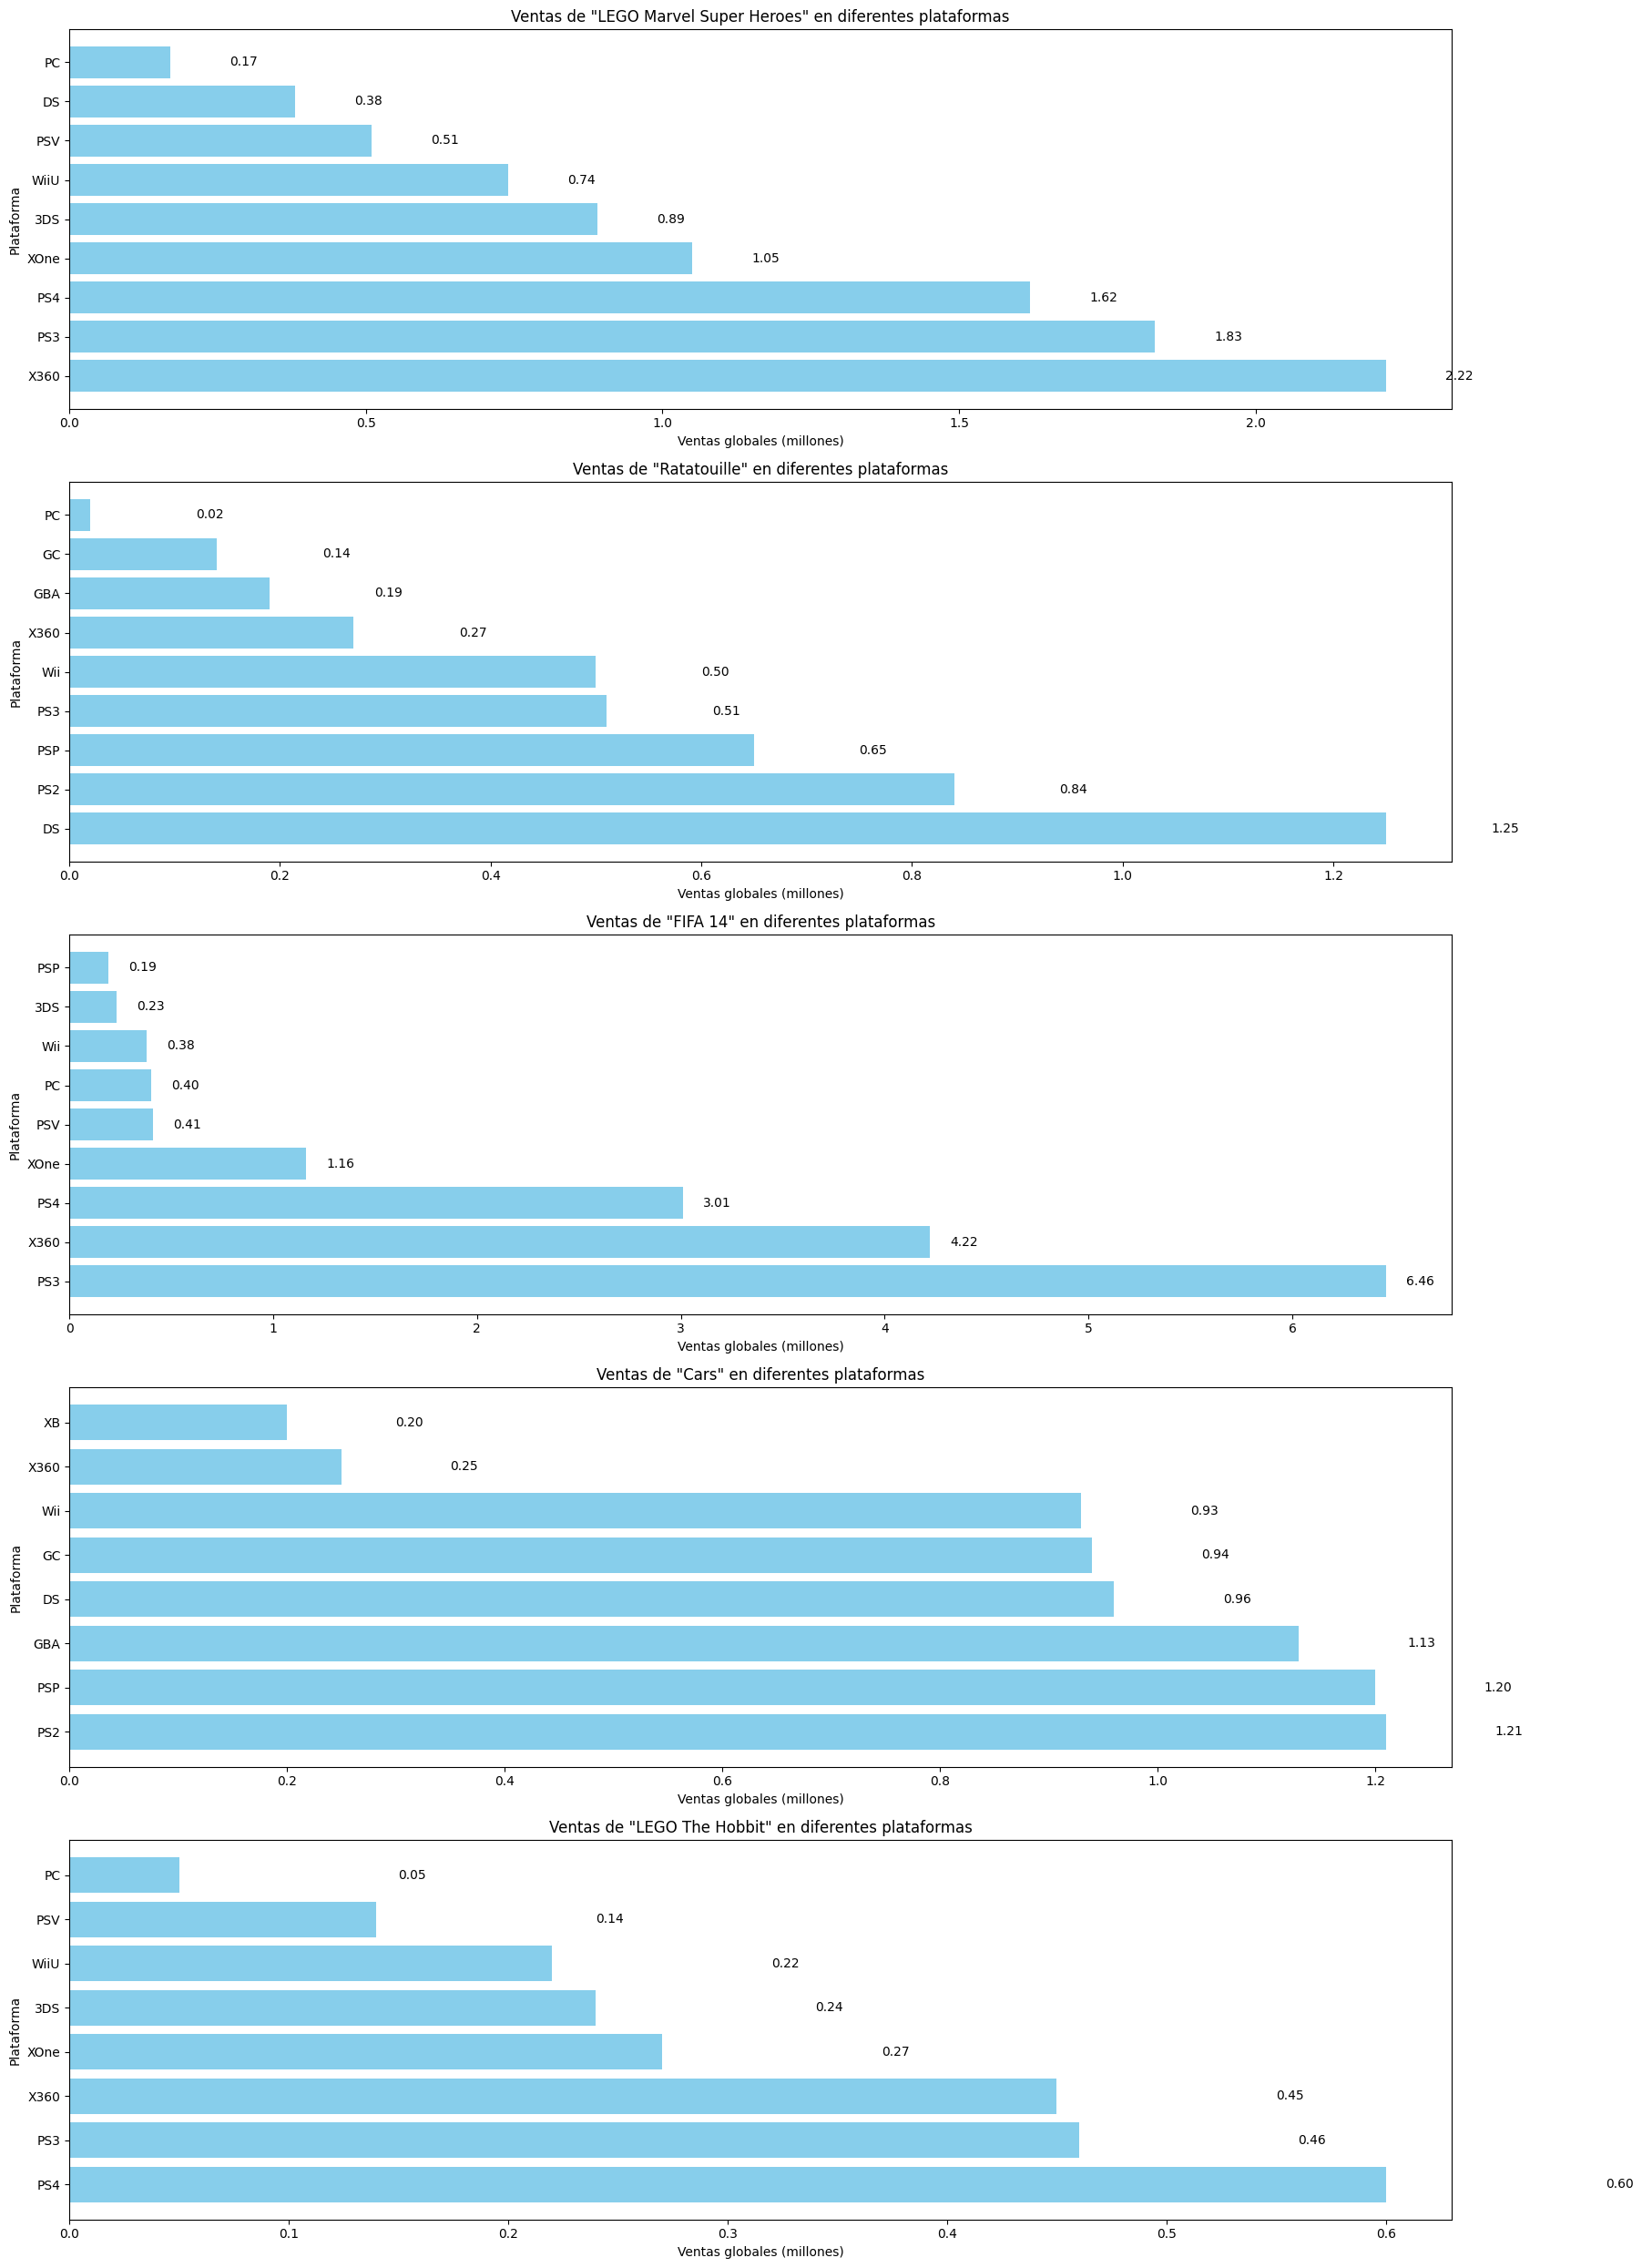

In [28]:
# Seleccionar los 5 juegos multiplataforma más comunes
sample_multiplatform_games = multiplatform_games['name'].value_counts().head(5).index  

# Crear una figura con subplots para cada juego multiplataforma
plt.figure(figsize=(18, 5 * len(sample_multiplatform_games)))

for i, game in enumerate(sample_multiplatform_games, 1):
    plt.subplot(len(sample_multiplatform_games), 1, i)
    game_data = sample_df[sample_df['name'] == game]
    bars = plt.barh(game_data['platform'], game_data['total_sales'], color='skyblue')
    plt.title(f'Ventas de "{game}" en diferentes plataformas')
    plt.xlabel('Ventas globales (millones)')
    plt.ylabel('Plataforma')
    
    # Agregar etiquetas de ventas a las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()




### Comparación de las ventas de los mismos juegos en diferentes plataformas

A continuación, se comparan las ventas de algunos juegos multiplataforma en las diferentes plataformas. Los gráficos muestran las variaciones en ventas para cada título, destacando la influencia de la plataforma en el éxito comercial del juego.

1. **"LEGO Marvel Super Heroes"**:
   - Las mayores ventas ocurrieron en **X360** (2.22 millones) y **PS3** (1.83 millones).
   - Las plataformas más recientes, como **PS4** y **XOne**, también tuvieron buenas ventas, aunque no tanto como las consolas de la generación anterior.
   - Las plataformas portátiles (DS, 3DS, PSV) y el PC tienen ventas significativamente más bajas para este juego.

2. **"Ratatouille"**:
   - Las ventas más altas se registraron en **DS** (1.25 millones) y **PS2** (0.84 millones).
   - Las plataformas más recientes, como la **PS3** y la **Wii**, tienen ventas moderadas, mientras que otras plataformas como **PC** y **GC** muestran ventas muy bajas.

3. **"FIFA 14"**:
   - Las ventas más altas se encuentran en **PS3** (6.46 millones) y **PS4** (4.22 millones), lo que muestra que los juegos deportivos tienden a tener mucho éxito en consolas PlayStation.
   - **X360** y **XOne** también tienen ventas considerables, pero ninguna otra plataforma se acerca a los números logrados por las consolas de Sony.

4. **"Cars"**:
   - Las ventas están más distribuidas entre varias plataformas. **PS2** y **PSP** lideran con ventas cercanas a 1.2 millones, pero otras plataformas como **DS**, **GBA**, y **Wii** también tienen ventas relativamente altas.
   - Esto sugiere que "Cars" tuvo éxito en múltiples plataformas, particularmente en las portátiles y consolas más antiguas.

5. **"LEGO The Hobbit"**:
   - La **PS4** tiene las mayores ventas (0.60 millones), seguida por **PS3** y **X360** con ventas alrededor de 0.45 millones.
   - Las plataformas portátiles y PC muestran ventas bajas, indicando que el juego tuvo más éxito en las consolas de generación reciente.

### Conclusiones
- La plataforma tiene un impacto significativo en las ventas de un juego. Por ejemplo, títulos deportivos como "FIFA 14" tienden a vender mejor en consolas PlayStation, mientras que juegos de aventuras como "LEGO Marvel Super Heroes" tienen éxito tanto en consolas de generaciones anteriores como en las más recientes.
- Los juegos multiplataforma tienden a tener ventas más altas en las consolas de sobremesa que en las portátiles o PC.
- Las ventas varían según la naturaleza del juego y el mercado al que se dirige, lo que demuestra la importancia de elegir la plataforma correcta para maximizar las ventas.


### Análisis de la distribución general de los juegos por género

En este paso, examinaremos la distribución de los juegos por género para identificar cuáles son los más rentables. Luego, analizaremos si podemos generalizar sobre los géneros con ventas altas y bajas.


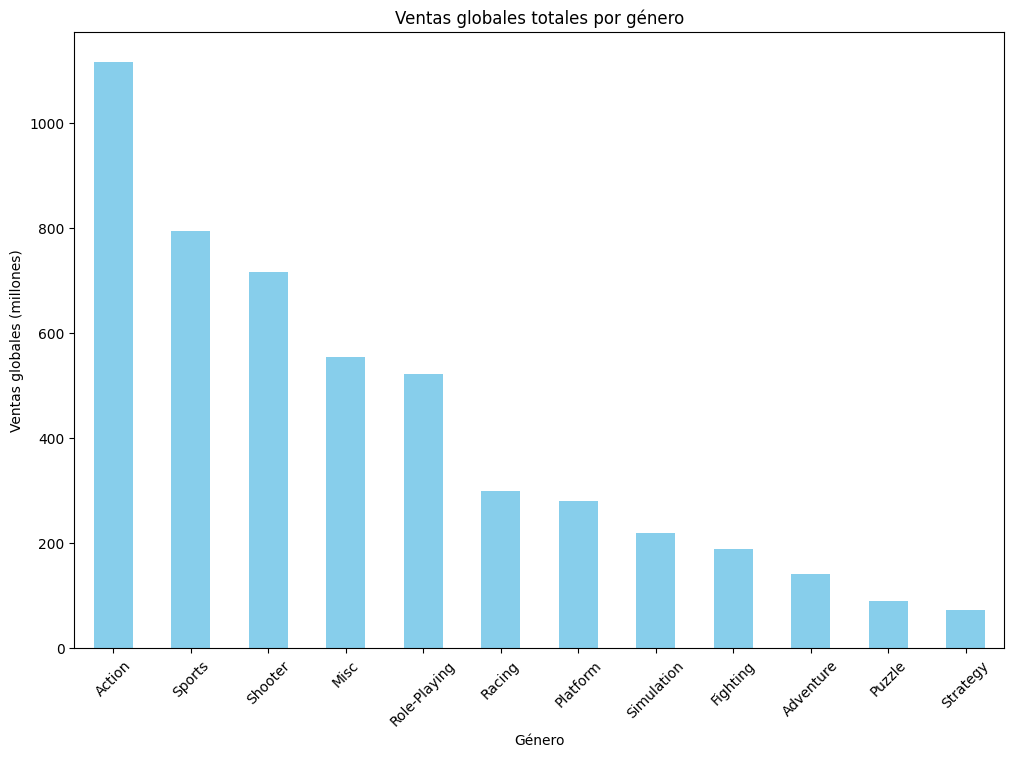

genre
Action          1116.65
Sports           793.85
Shooter          717.04
Misc             554.86
Role-Playing     522.40
Racing           299.00
Platform         279.74
Simulation       220.65
Fighting         188.42
Adventure        141.35
Puzzle            89.92
Strategy          73.14
Name: total_sales, dtype: float64


In [29]:
# Calcular las ventas totales por género
genre_sales = relevant_games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar la distribución de las ventas por género
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas globales totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show()

# Mostrar las ventas totales por género
print(genre_sales)


### Análisis de la distribución general de los juegos por género

El gráfico muestra la distribución de las ventas globales totales por género, lo que nos permite identificar cuáles son los géneros más y menos rentables.

1. **Géneros más rentables**:
   - **Acción** es el género más rentable, con ventas globales totales de 1116.65 millones. Esto sugiere que los juegos de acción son altamente populares y tienen un mercado amplio.
   - **Deportes** y **Shooter** también son géneros altamente rentables, con ventas de 793.85 millones y 717.04 millones, respectivamente. Los juegos deportivos suelen tener un público fiel, mientras que los shooters tienden a atraer a una gran comunidad de jugadores competitivos.

2. **Géneros de rentabilidad media**:
   - Géneros como **Misc**, **Role-Playing**, **Racing**, y **Platform** tienen ventas moderadas. Los juegos de rol y carreras suelen tener una base de seguidores específica, mientras que los juegos de plataformas continúan siendo populares, aunque en menor medida que los de acción y deportes.

3. **Géneros menos rentables**:
   - Los géneros **Adventure**, **Puzzle**, y **Strategy** presentan las ventas más bajas, con **Strategy** siendo el menos rentable con solo 73.14 millones en ventas globales.
   - Estos géneros pueden tener un público más reducido y especializado, lo que limita su alcance en términos de ventas.

### Conclusiones
- Los géneros **Acción**, **Deportes**, y **Shooter** son los más rentables, lo que indica que los juegos que pertenecen a estas categorías tienen un mercado más amplio y un potencial significativo para alcanzar ventas altas.
- Los géneros menos rentables, como **Adventure**, **Puzzle**, y **Strategy**, parecen estar dirigidos a un nicho más pequeño de jugadores, resultando en menores ventas globales.
- Podemos generalizar que los géneros que ofrecen experiencias más dinámicas y competitivas (como Acción y Shooter) tienden a generar mayores ventas, mientras que los géneros más especializados y orientados a la estrategia o resolución de problemas tienen ventas más bajas.


## Paso 4. Crea un perfil de usuario para cada región

En este paso, analizaremos las diferencias en las preferencias de los usuarios en las tres principales regiones: Norteamérica (NA), Europa (EU) y Japón (JP). Para cada región, realizaremos las siguientes tareas:

1. **Las cinco plataformas principales**: Identificaremos las cinco plataformas más exitosas en cada región y analizaremos las variaciones en sus cuotas de mercado para observar cómo difieren las preferencias de los usuarios entre las regiones.

2. **Los cinco géneros principales**: Determinaremos los cinco géneros más populares en cada región y explicaremos las diferencias, lo que nos permitirá identificar tendencias regionales en términos de preferencias de género de juego.

3. **Clasificaciones ESRB y su impacto**: Evaluaremos si las clasificaciones de la ESRB (Entertainment Software Rating Board) afectan a las ventas en cada región. Esto nos ayudará a comprender cómo las restricciones de edad y contenido pueden influir en el comportamiento de los usuarios en diferentes mercados.

Este análisis nos permitirá obtener una visión más completa del perfil de usuario en cada región y cómo sus preferencias pueden variar según la plataforma, género y clasificación de contenido.


### Perfil de usuario por región: plataformas principales

En este paso, identificaremos las cinco plataformas principales para cada región (Norteamérica, Europa, y Japón) y compararemos sus cuotas de mercado. Esto nos permitirá observar las diferencias en las preferencias de plataforma entre las regiones.


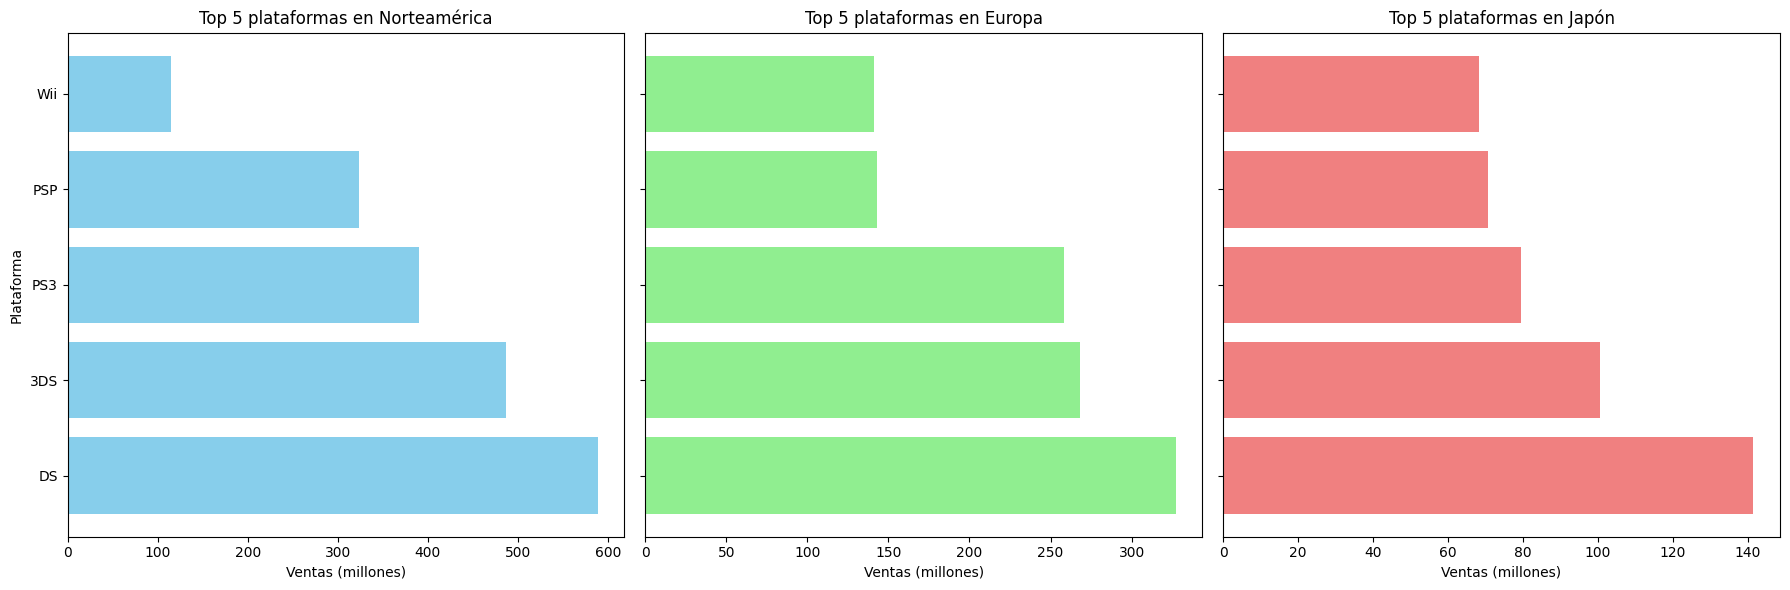

Top 5 plataformas en Norteamérica:
platform
X360    588.84
Wii     486.87
PS3     390.13
DS      323.99
PS2     114.89
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS3     327.21
X360    267.89
Wii     258.32
DS      142.99
PS4     141.09
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
platform
DS     141.49
3DS    100.62
PS3     79.41
PSP     70.63
Wii     68.28
Name: jp_sales, dtype: float64


In [31]:
# Calcular las ventas por plataforma en cada región
platform_sales_na = relevant_games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_sales_eu = relevant_games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_sales_jp = relevant_games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionar las cinco plataformas principales para cada región
top5_na = platform_sales_na.head(5)
top5_eu = platform_sales_eu.head(5)
top5_jp = platform_sales_jp.head(5)

# Visualizar las cinco plataformas principales en cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gráfico para Norteamérica
axes[0].barh(top5_na.index, top5_na.values, color='skyblue')
axes[0].set_title('Top 5 plataformas en Norteamérica')
axes[0].set_xlabel('Ventas (millones)')
axes[0].set_ylabel('Plataforma')

# Gráfico para Europa
axes[1].barh(top5_eu.index, top5_eu.values, color='lightgreen')
axes[1].set_title('Top 5 plataformas en Europa')
axes[1].set_xlabel('Ventas (millones)')

# Gráfico para Japón
axes[2].barh(top5_jp.index, top5_jp.values, color='lightcoral')
axes[2].set_title('Top 5 plataformas en Japón')
axes[2].set_xlabel('Ventas (millones)')

plt.tight_layout()
plt.show()

# Mostrar las cinco principales plataformas en cada región
print("Top 5 plataformas en Norteamérica:")
print(top5_na)
print("\nTop 5 plataformas en Europa:")
print(top5_eu)
print("\nTop 5 plataformas en Japón:")
print(top5_jp)


### Las cinco plataformas principales por región

A continuación, se analizan las cinco plataformas principales en términos de ventas para cada región: Norteamérica, Europa y Japón, y se comparan las variaciones en sus cuotas de mercado.

1. **Norteamérica**:
   - Las plataformas líderes son **X360** (588.84 millones), seguida por **Wii** (486.87 millones) y **PS3** (390.13 millones).
   - El mercado norteamericano muestra una clara preferencia por las consolas de sobremesa, en particular las de Microsoft y Nintendo.
   - La **DS** también aparece entre las plataformas principales, destacando el interés en las consolas portátiles, aunque con menos ventas que las consolas de sobremesa.

2. **Europa**:
   - En Europa, **PS3** lidera con 327.21 millones en ventas, seguida por **X360** (267.89 millones) y **Wii** (258.32 millones).
   - La **PS4** entra en el top 5 en esta región con 141.09 millones en ventas, lo que sugiere una tendencia hacia la adopción de las consolas más nuevas.
   - Similar a Norteamérica, las consolas de sobremesa dominan, aunque la **DS** también tiene un lugar significativo, lo que muestra un interés por las consolas portátiles.

3. **Japón**:
   - Japón muestra una preferencia diferente: **DS** lidera con 141.49 millones, seguida por **3DS** (100.62 millones) y **PSP** (70.63 millones).
   - Esto indica que las consolas portátiles son las preferidas en el mercado japonés, en contraste con Norteamérica y Europa.
   - **PS3** y **Wii** también tienen ventas significativas, pero las consolas portátiles dominan el mercado japonés.

### Conclusiones
- **Variación en las cuotas de mercado**:
  - **Norteamérica** y **Europa** prefieren las consolas de sobremesa, con la **X360**, **PS3**, y **Wii** liderando las ventas.
  - **Japón** tiene una clara inclinación hacia las consolas portátiles, con la **DS**, **3DS**, y **PSP** dominando el mercado.
  - Europa muestra una tendencia a adoptar las consolas más recientes, como la **PS4**, mientras que Norteamérica y Japón muestran más lealtad hacia las consolas establecidas.


### Perfil de usuario por región: géneros principales

En este paso, identificaremos los cinco géneros más populares en cada región (Norteamérica, Europa, y Japón) para observar cómo varían las preferencias de los jugadores según la región.


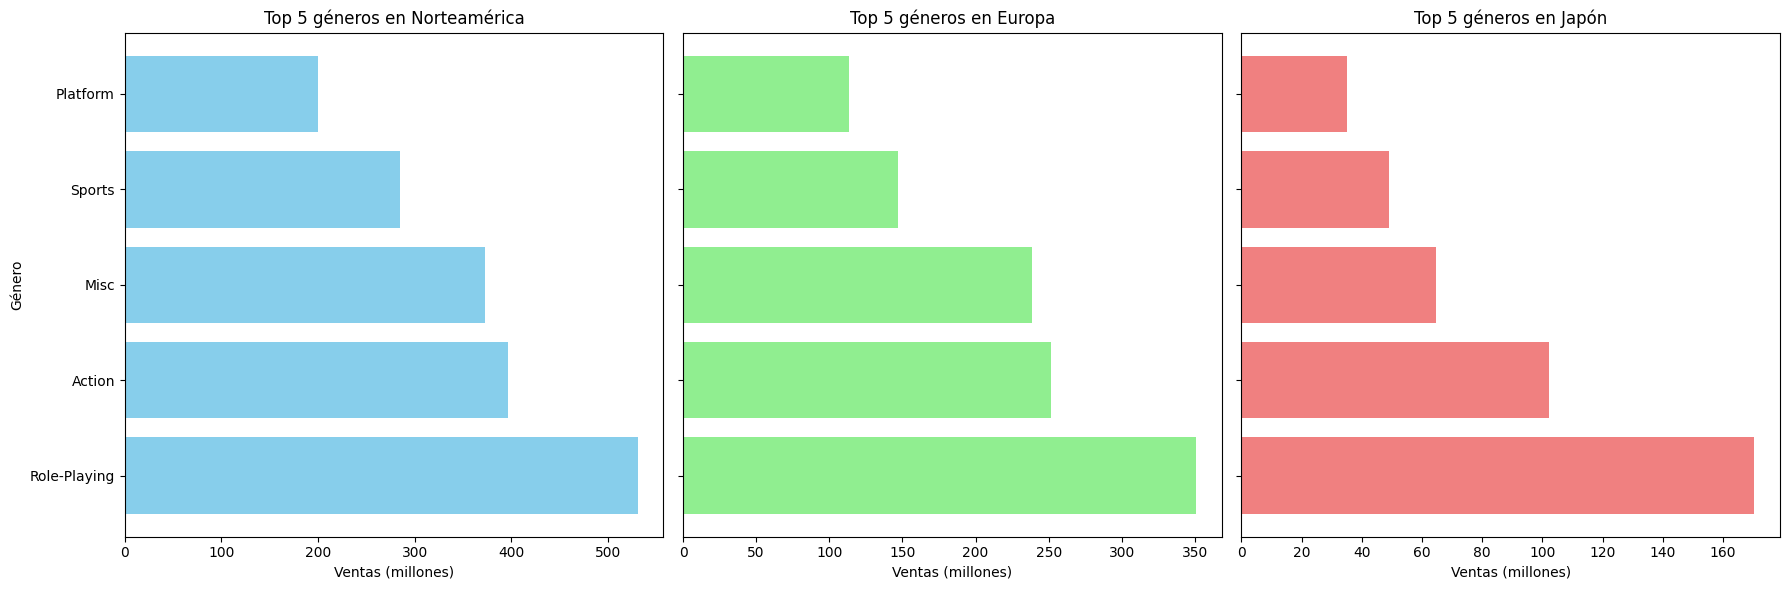

Top 5 géneros en Norteamérica:
genre
Action          530.44
Sports          396.64
Shooter         373.13
Misc            285.06
Role-Playing    199.63
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action     350.70
Sports     251.55
Shooter    238.89
Misc       146.88
Racing     113.39
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
genre
Role-Playing    170.38
Action          102.07
Misc             64.53
Sports           48.97
Platform         35.20
Name: jp_sales, dtype: float64


In [32]:
# Calcular las ventas por género en cada región
genre_sales_na = relevant_games_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_sales_eu = relevant_games_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_sales_jp = relevant_games_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionar los cinco géneros principales para cada región
top5_genres_na = genre_sales_na.head(5)
top5_genres_eu = genre_sales_eu.head(5)
top5_genres_jp = genre_sales_jp.head(5)

# Visualizar los cinco géneros principales en cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gráfico para Norteamérica
axes[0].barh(top5_genres_na.index, top5_genres_na.values, color='skyblue')
axes[0].set_title('Top 5 géneros en Norteamérica')
axes[0].set_xlabel('Ventas (millones)')
axes[0].set_ylabel('Género')

# Gráfico para Europa
axes[1].barh(top5_genres_eu.index, top5_genres_eu.values, color='lightgreen')
axes[1].set_title('Top 5 géneros en Europa')
axes[1].set_xlabel('Ventas (millones)')

# Gráfico para Japón
axes[2].barh(top5_genres_jp.index, top5_genres_jp.values, color='lightcoral')
axes[2].set_title('Top 5 géneros en Japón')
axes[2].set_xlabel('Ventas (millones)')

plt.tight_layout()
plt.show()

# Mostrar los cinco géneros principales en cada región
print("Top 5 géneros en Norteamérica:")
print(top5_genres_na)
print("\nTop 5 géneros en Europa:")
print(top5_genres_eu)
print("\nTop 5 géneros en Japón:")
print(top5_genres_jp)


### Los cinco géneros principales por región

A continuación, se analizan los cinco géneros más populares en términos de ventas para cada región: Norteamérica, Europa y Japón, y se comparan las diferencias en las preferencias de los jugadores.

1. **Norteamérica**:
   - Los géneros más populares son **Acción** (530.44 millones), **Deportes** (396.64 millones), y **Shooter** (373.13 millones).
   - Esto indica que los jugadores norteamericanos prefieren juegos con un enfoque dinámico y competitivo, como los juegos de acción y disparos.
   - El género **Misceláneo** (Misc) también tiene una buena cuota de mercado, lo que puede incluir varios tipos de juegos casuales. **Role-Playing** ocupa un lugar relevante, aunque menor que los otros géneros principales.

2. **Europa**:
   - En Europa, los géneros principales son similares a los de Norteamérica: **Acción** (350.70 millones), **Deportes** (251.55 millones), y **Shooter** (238.89 millones).
   - Esto sugiere que las preferencias de los jugadores europeos están alineadas con las de los norteamericanos, aunque el género **Racing** entra en el top 5, reflejando un interés particular en los juegos de carreras.
   - **Misceláneo** (Misc) también tiene una presencia considerable en el mercado europeo.

3. **Japón**:
   - Japón tiene un perfil de usuario claramente diferente: el género más popular es **Role-Playing** (170.38 millones), seguido por **Acción** (102.07 millones).
   - Las ventas de géneros como **Deportes** y **Plataformas** son menores en comparación con Norteamérica y Europa.
   - La fuerte preferencia por los juegos de rol refleja la cultura de juego en Japón, donde los títulos de rol tienden a ser más complejos y ofrecen experiencias inmersivas.

### Conclusiones
- **Norteamérica y Europa** comparten una preferencia similar por los géneros de **Acción**, **Deportes**, y **Shooter**, lo que sugiere que estos mercados tienen tendencias alineadas hacia juegos con un enfoque competitivo y dinámico.
- **Japón**, en cambio, muestra una preferencia única por el género **Role-Playing**, lo que indica que los jugadores japoneses valoran más las experiencias de juego narrativas y complejas.
- Las diferencias regionales en las preferencias de género resaltan la importancia de adaptar los títulos y estrategias de marketing para cada mercado específico.


### Análisis del impacto de las clasificaciones ESRB en las ventas por región

En este paso, examinaremos si las clasificaciones de la ESRB (Entertainment Software Rating Board) afectan las ventas en cada región (Norteamérica, Europa, y Japón). Esto nos permitirá entender si las restricciones de edad y contenido influyen en el comportamiento de compra en los diferentes mercados.


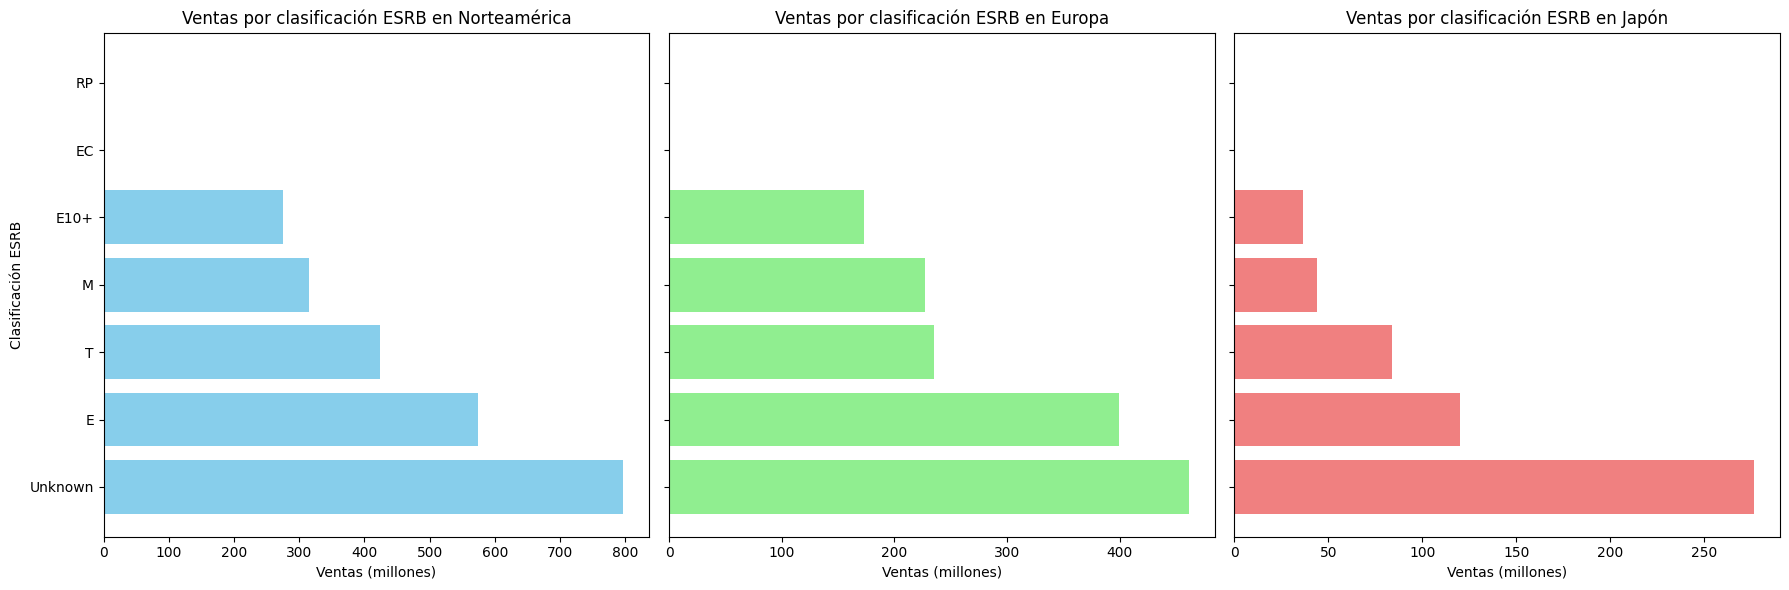

Ventas por clasificación ESRB en Norteamérica:
rating
E          796.98
M          574.33
T          424.14
E10+       315.40
Unknown    274.50
EC           1.32
RP           0.00
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en Europa:
rating
E          461.09
M          398.90
T          235.44
Unknown    227.19
E10+       173.35
RP           0.03
EC           0.00
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en Japón:
rating
Unknown    276.69
E          120.36
T           83.90
M           43.79
E10+        36.57
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


In [33]:
# Calcular las ventas por clasificación ESRB en cada región
esrb_sales_na = relevant_games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = relevant_games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = relevant_games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Visualizar las ventas por clasificación ESRB en cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gráfico para Norteamérica
axes[0].barh(esrb_sales_na.index, esrb_sales_na.values, color='skyblue')
axes[0].set_title('Ventas por clasificación ESRB en Norteamérica')
axes[0].set_xlabel('Ventas (millones)')
axes[0].set_ylabel('Clasificación ESRB')

# Gráfico para Europa
axes[1].barh(esrb_sales_eu.index, esrb_sales_eu.values, color='lightgreen')
axes[1].set_title('Ventas por clasificación ESRB en Europa')
axes[1].set_xlabel('Ventas (millones)')

# Gráfico para Japón
axes[2].barh(esrb_sales_jp.index, esrb_sales_jp.values, color='lightcoral')
axes[2].set_title('Ventas por clasificación ESRB en Japón')
axes[2].set_xlabel('Ventas (millones)')

plt.tight_layout()
plt.show()

# Mostrar las ventas por clasificación ESRB en cada región
print("Ventas por clasificación ESRB en Norteamérica:")
print(esrb_sales_na)
print("\nVentas por clasificación ESRB en Europa:")
print(esrb_sales_eu)
print("\nVentas por clasificación ESRB en Japón:")
print(esrb_sales_jp)


### Impacto de las clasificaciones ESRB en las ventas por región

A continuación, se analizan las ventas por clasificación ESRB en cada región (Norteamérica, Europa y Japón) para determinar si la clasificación ESRB afecta las ventas en estos mercados.

1. **Norteamérica**:
   - La clasificación **E** (Everyone) es la más exitosa, con 796.98 millones en ventas. Esto sugiere que los juegos aptos para todas las edades son altamente populares en el mercado norteamericano.
   - Las clasificaciones **M** (Mature) y **T** (Teen) también tienen ventas significativas, con 574.33 millones y 424.14 millones, respectivamente, lo que indica que hay un mercado considerable para juegos orientados a adolescentes y adultos.
   - La categoría **E10+** (Everyone 10 and older) tiene ventas menores en comparación, y la clasificación **Unknown** también muestra un volumen de ventas alto (274.50 millones), lo que podría incluir juegos que no tienen una clasificación ESRB.

2. **Europa**:
   - Similar a Norteamérica, la clasificación **E** lidera las ventas con 461.09 millones, seguida de **M** (398.90 millones) y **T** (235.44 millones).
   - La preferencia en Europa parece alinearse con la de Norteamérica, valorando los juegos aptos para todas las edades y aquellos orientados a adolescentes y adultos.
   - La categoría **E10+** tiene un volumen de ventas menor, mientras que **Unknown** muestra un volumen considerable (227.19 millones), lo que indica la presencia de juegos sin clasificación ESRB.

3. **Japón**:
   - A diferencia de Norteamérica y Europa, en Japón, la categoría **Unknown** lidera con 276.69 millones en ventas. Esto puede deberse a que muchos juegos japoneses no utilizan la clasificación ESRB, sino otros sistemas de clasificación.
   - La clasificación **E** (120.36 millones) ocupa el segundo lugar, seguida por **T** (83.90 millones) y **M** (43.79 millones).
   - Las bajas ventas en categorías como **M** y **E10+** sugieren que el mercado japonés tiene una orientación diferente y no depende tanto del sistema de clasificación ESRB.

### Conclusiones
- En **Norteamérica** y **Europa**, la clasificación **E** (Everyone) es la más popular, lo que indica que los juegos para todas las edades tienen un mayor atractivo en estos mercados.
- Las clasificaciones **M** y **T** también son populares en ambas regiones, lo que refleja un mercado diversificado que incluye juegos orientados tanto a adolescentes como a adultos.
- En **Japón**, la mayoría de los juegos tienen una clasificación **Unknown**, lo que sugiere que los títulos japoneses no suelen seguir el sistema de clasificación ESRB. Esto resalta la importancia de considerar otros sistemas de clasificación al analizar el mercado japonés.
- La influencia de la clasificación ESRB es evidente en Norteamérica y Europa, mientras que en Japón, las ventas no parecen estar vinculadas a esta clasificación en la misma medida.


## Paso 5. Prueba de hipótesis

En este paso, realizaremos pruebas estadísticas para validar las siguientes hipótesis:

1. **Hipótesis 1**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. **Hipótesis 2**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para cada hipótesis:
- Estableceremos una hipótesis nula y una hipótesis alternativa.
- Determinaremos un valor de umbral alfa (nivel de significancia) para decidir si rechazamos o no la hipótesis nula.
- Aplicaremos la prueba estadística adecuada y explicaremos el criterio utilizado para elegirla.


### Prueba de hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

En este apartado, probaremos la primera hipótesis:

- **Hipótesis nula (H₀)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- **Hipótesis alternativa (Hₐ)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Para esta prueba, utilizaremos un valor de umbral alfa de **0.05** (5%). La prueba estadística seleccionada es la **prueba t de Student para dos muestras independientes**, ya que compararemos las medias de dos grupos diferentes (calificaciones de Xbox One y PC) para evaluar si hay una diferencia significativa.

A continuación, aplicaremos la prueba estadística para evaluar la hipótesis.


In [34]:
from scipy import stats

# Extraer las calificaciones de los usuarios para Xbox One y PC, eliminando valores nulos
xbox_one_scores = relevant_games_df[(relevant_games_df['platform'] == 'XOne') & (relevant_games_df['user_score'].notna())]['user_score']
pc_scores = relevant_games_df[(relevant_games_df['platform'] == 'PC') & (relevant_games_df['user_score'].notna())]['user_score']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Establecer el umbral alfa
alpha = 0.05

# Mostrar resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Determinar si rechazamos la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")


Estadístico t: -2.308143500124063
Valor p: 0.021435473266243833
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


### Resultados de la prueba de hipótesis 1

- **Estadístico t**: -2.31
- **Valor p**: 0.021

Dado que el valor p es menor que el umbral alfa de 0.05, rechazamos la hipótesis nula. Esto significa que hay suficiente evidencia para concluir que las calificaciones promedio de los usuarios para las plataformas **Xbox One** y **PC** son diferentes. Por lo tanto, las preferencias o valoraciones de los usuarios varían entre estas dos plataformas.

### Conclusión
Los resultados indican una diferencia significativa en las calificaciones promedio de los usuarios entre **Xbox One** y **PC**. Esto podría deberse a diferencias en los juegos disponibles, la experiencia del usuario en cada plataforma, o las expectativas de los jugadores de cada comunidad.


### Prueba de hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

En este apartado, probaremos la segunda hipótesis:

- **Hipótesis nula (H₀)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- **Hipótesis alternativa (Hₐ)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Usaremos un valor de umbral alfa de **0.05** (5%). La prueba estadística seleccionada es la **prueba t de Student para dos muestras independientes**, ya que compararemos las medias de dos grupos diferentes (calificaciones de los géneros de Acción y Deportes).


In [36]:
# Extraer las calificaciones de los usuarios para los géneros de Acción y Deportes, eliminando valores nulos
action_scores = relevant_games_df[(relevant_games_df['genre'] == 'Action') & (relevant_games_df['user_score'].notna())]['user_score']
sports_scores = relevant_games_df[(relevant_games_df['genre'] == 'Sports') & (relevant_games_df['user_score'].notna())]['user_score']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Establecer el umbral alfa
alpha = 0.05

# Mostrar resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Determinar si rechazamos la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")


Estadístico t: 5.886185436455115
Valor p: 4.571038404232361e-09
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


### Resultados de la prueba de hipótesis 2

- **Estadístico t**: 5.89
- **Valor p**: 4.57e-09

Dado que el valor p es extremadamente bajo y menor que el umbral alfa de 0.05, rechazamos la hipótesis nula. Esto significa que hay suficiente evidencia para concluir que las calificaciones promedio de los usuarios para los géneros de **Acción** y **Deportes** son diferentes.

### Conclusión
Los resultados indican que las calificaciones promedio de los usuarios varían significativamente entre los géneros de **Acción** y **Deportes**. Esto puede ser debido a diferentes expectativas y experiencias que los jugadores asocian con cada género. Por lo tanto, es importante considerar estas diferencias al analizar las preferencias de los usuarios y planificar campañas publicitarias específicas para cada género.


## Paso 6. Conclusión general

En este proyecto, analizamos un conjunto de datos sobre videojuegos para identificar patrones de éxito y comprender las preferencias de los usuarios en diferentes regiones. Comenzamos con la preparación y limpieza de los datos, abordando valores ausentes y estandarizando los formatos para facilitar el análisis. Calculamos métricas importantes, como las ventas totales, y analizamos las tendencias de plataformas y géneros populares en distintas regiones (Norteamérica, Europa y Japón). 

Durante el análisis, encontramos que las preferencias de los usuarios varían según la región; por ejemplo, las consolas portátiles son más populares en Japón, mientras que las consolas de sobremesa dominan en Norteamérica y Europa. Asimismo, los géneros de juegos también muestran variaciones significativas entre mercados, destacando la importancia de conocer el perfil de los usuarios para diseñar estrategias de marketing efectivas. 

Mediante pruebas de hipótesis, descubrimos que las calificaciones promedio de los usuarios varían según la plataforma y el género, lo que resalta la diversidad de gustos y expectativas en el mercado de los videojuegos. Este tipo de análisis ofrece una valiosa perspectiva para las empresas, ya que les permite tomar decisiones informadas y adaptar sus campañas a las preferencias del público objetivo.

Para concluir, este proyecto demostró la importancia de la limpieza y el análisis de datos para obtener información valiosa. Trabajar con datos abiertos y aplicar métodos estadísticos nos brinda una comprensión más profunda del mercado, ayudando a planificar estrategias efectivas para futuros lanzamientos y campañas publicitarias.
